In [1]:
import matplotlib as mpl
import pandas
import seaborn

% matplotlib inline

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

seaborn.set_style('whitegrid')
seaborn.set_palette('colorblind')

In [2]:
INPUT_FILEPATH = '../answers/answers.xlsx'
OUTPUT_PATH = 'fig/{}.pdf'
FIGSIZE = (4, 2)

def savefig(fig, filename):
    # Remove title?
    list(map(lambda ax: ax.set_title(''), fig.axes))
    
    # Separate title
    #list(map(lambda ax: ax.set_title(ax.get_title() + '\n'), fig.axes))
    
    # Save?
    fig.savefig(OUTPUT_PATH.format(filename.replace('.', '-')), bbox_inches='tight')

In [3]:
scales = {
    'experience': ['None', '<1', '1-2', '3-4', '5 or more'],
    'proficiency': ['Inexistent', 'Poor', 'Acceptable', 'Good', 'Very Good'],
    'familiarity': ['I don’t know what this is', 'I know it but never used it', 'I use it occasionally', 'I use it regularly'],
    'helpfulness': ['Not at all', 'Slightly', 'Moderately', 'Very', 'Extremely'],
    'comparison': ['Much lower', 'Lower', 'About the same', 'Higher', 'Much higher'],
    'difficulty': ['Very difficult', 'Difficult', 'Easy', 'Very easy'],
    'convenience': ['Very inconvenient', 'Inconvenient', 'Convenient', 'Very convenient'],    
}

In [4]:
def plot_distribution(ax, serie, title, labels, values):
    int_values = serie.replace(labels, values)
    
    value_counts = int_values.value_counts()
    n = len(serie)
    
    seaborn.barplot(values, [value_counts.get(x, 0) for x in values], color=seaborn.color_palette()[0], ax=ax)
    
    p25, p50, p75 = pandas.np.percentile(int_values, [25, 50, 75], interpolation='nearest')
    min_v, max_v = int_values.min(), int_values.max()
 
    height = 0.1 * n
    y_pos = 0.8 * n
    ax.hlines(y_pos, min_v, max_v, color='.75')
    ax.vlines([min_v, max_v], y_pos - height/2, y_pos + height/2, color='.75')
    ax.add_patch(
        mpl.patches.Rectangle((p25, y_pos - height/2), p75-p25, height, facecolor='.95', edgecolor='.25', zorder=2)
    )
    ax.vlines(p50, y_pos - height/2, y_pos + height/2, colors='.0', zorder=3, linewidth=3)
    ax.vlines(int_values.mean(), 0, n, colors='r', linestyle=':', zorder=3)
    
    ax.set_title(title)
    ax.set_ylim(0, n)
    
    #rotate = 10 * int(any([len(label) >= 20 for label in labels]))

    n_labels = []
    for i, label in enumerate(labels):
        if i % 2 == 0:
            n_labels.append(label)
        else:
            n_labels.append('\n' + label)
            
    ax.set_xticklabels(n_labels)
    ax.set_xticks(values)
    ax.xaxis.set_tick_params(direction='out', length=5, width=1)
    
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(n//4))
    
    print(title)
    print(min_v, p25, p50, p75, max_v, 'avg:', int_values.mean())
    mpl.pyplot.show()

#fig, ax = mpl.pyplot.subplots()
#fig.set_size_inches(FIGSIZE)
#plot_distribution(ax, data['1.2.2'], 'X', scales['experience'], list(range(5)))

In [5]:
data = pandas.read_excel(INPUT_FILEPATH)

In [6]:
questions = [
    ('1.2.1', 'Years of programming experience', 'experience'),
    ('1.2.2', 'Years of experience with Python', 'experience'),
    ('1.2.3', 'Proficiency with Python', 'proficiency'), 
    ('1.2.4.A', 'Familiarity with BDD', 'familiarity'),
    ('1.2.4.B', 'Familiarity with Gherkin', 'familiarity'),
    ('1.2.4.C', 'Familiarity with TDD', 'familiarity'),
    ('1.2.4.D', 'Familiarity with Unit Testing', 'familiarity'),
    ('1.2.4.E', 'Familiarity with DbC', 'familiarity'),
    
    ('T2.2', 'Scenario specification understandability', 'helpfulness'),
    ('T2.3', 'Confidence after having read the scenarios', 'helpfulness'),
    ('T3.3', 'Confidence after having executed the scenarios', 'comparison'),
    ('T4.2', 'Visual representation readability', 'helpfulness'),
    ('T4.3', 'YAML specification readability', 'helpfulness'),
    ('T4.4', 'Visually defining and modifying statecharts', 'difficulty'),
    ('T4.5', 'Textually defining and modifying statecharts', 'difficulty'),
    ('T5.3', 'Contracts usefulness', 'helpfulness'),
    ('T5.4', 'Contracts implementation', 'convenience'),
    ('T6.5', 'Specify scenarios', 'difficulty'),
    ('T6.6', 'Implementing the lamp', 'difficulty'),
    ('T6.7', 'Scenarios helpfulness for the lamp', 'helpfulness'),
    ('T8.5', 'Property statecharts usefulness', 'helpfulness'),
    ('T8.6', 'Property statecharts understandability', 'difficulty'),
    ('T8.7', 'Property statecharts writeability', 'difficulty'),
    ('T8.8', 'Property statecharts helpfulness', 'helpfulness'),
    ('4.1.A', 'BDD for new statecharts', 'helpfulness'),
    ('4.1.B', 'Contracts for new statecharts', 'helpfulness'),
    ('4.1.C', 'Property statecharts for new statecharts', 'helpfulness'),
    ('4.2.A', 'BDD to verify statecharts', 'helpfulness'),
    ('4.2.B', 'Contracts to verify statecharts', 'helpfulness'),
    ('4.2.C', 'Property statecharts to verify statecharts', 'helpfulness'),
    ('4.3.A', 'BDD to modify statecharts', 'helpfulness'),
    ('4.3.B', 'Contracts to modify statecharts', 'helpfulness'),
    ('4.3.C', 'Property statecharts to modify statecharts', 'helpfulness'),
]

Years of programming experience
3 3 4 4 4 avg: 3.69230769231


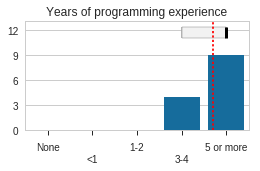

Years of experience with Python
1 1 3 4 4 avg: 2.61538461538


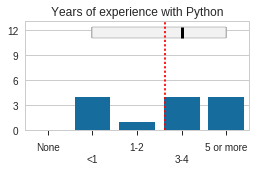

Proficiency with Python
1 2 3 3 3 avg: 2.38461538462


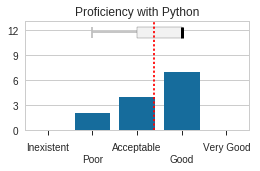

Familiarity with BDD
0 0 1 1 2 avg: 0.615384615385


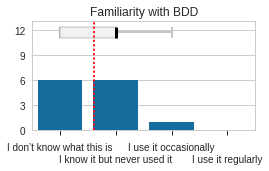

Familiarity with Gherkin
0 0 0 0 2 avg: 0.230769230769


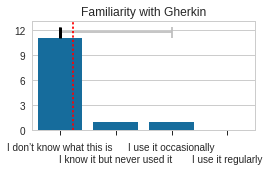

Familiarity with TDD
1 1 2 2 3 avg: 1.92307692308


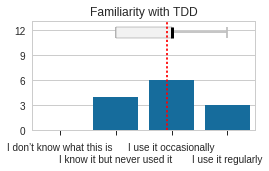

Familiarity with Unit Testing
1 2 2 3 3 avg: 2.38461538462


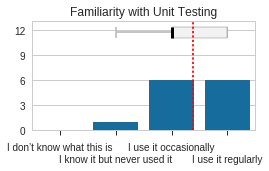

Familiarity with DbC
0 1 1 1 2 avg: 1.15384615385


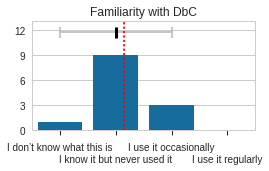

Scenario specification understandability
1 3 3 4 4 avg: 3.15384615385


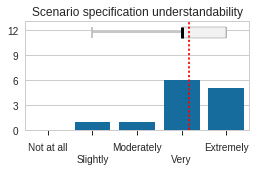

Confidence after having read the scenarios
2 2 3 3 4 avg: 2.92307692308


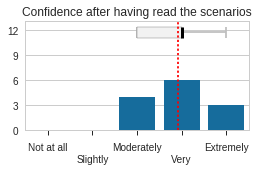

Confidence after having executed the scenarios
2 2 3 3 4 avg: 2.76923076923


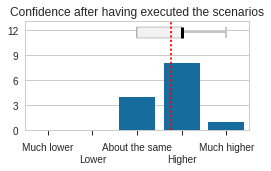

Visual representation readability
2 3 3 4 4 avg: 3.30769230769


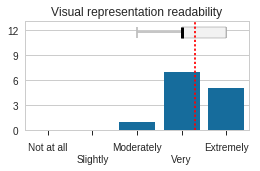

YAML specification readability
2 2 2 3 4 avg: 2.53846153846


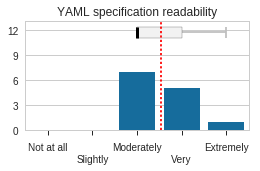

Visually defining and modifying statecharts
1 2 2 3 3 avg: 2.07692307692


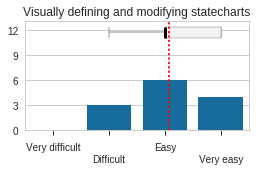

Textually defining and modifying statecharts
1 1 2 2 3 avg: 1.76923076923


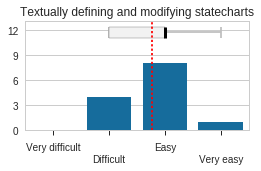

Contracts usefulness
2 3 3 4 4 avg: 3.15384615385


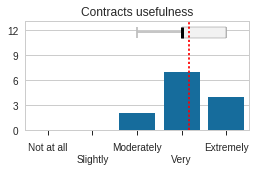

Contracts implementation
1 2 2 3 3 avg: 2.30769230769


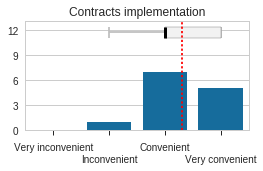

Specify scenarios
1 2 2 2 3 avg: 2.07692307692


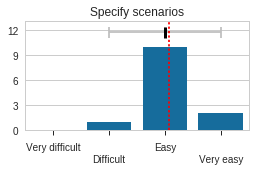

Implementing the lamp
2 2 2 2 3 avg: 2.07692307692


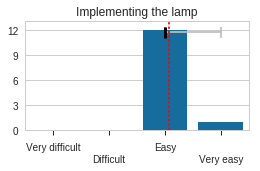

Scenarios helpfulness for the lamp
0 2 2 3 3 avg: 1.92307692308


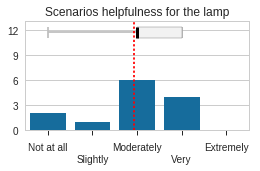

Property statecharts usefulness
1 2 3 3 4 avg: 2.69230769231


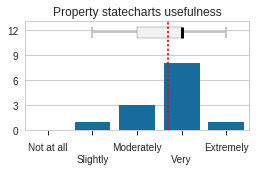

Property statecharts understandability
1 2 2 2 3 avg: 2.0


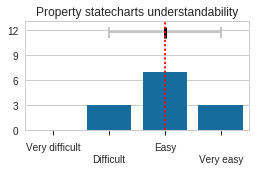

Property statecharts writeability
0 1 2 2 2 avg: 1.53846153846


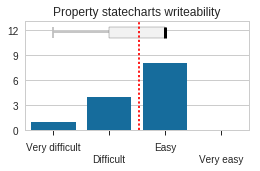

Property statecharts helpfulness
0 2 3 3 4 avg: 2.53846153846


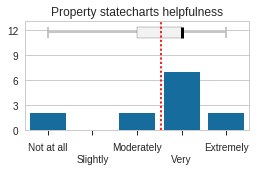

BDD for new statecharts
2 2 3 3 4 avg: 2.84615384615


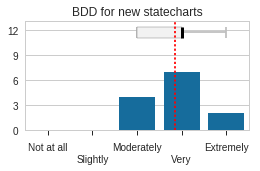

Contracts for new statecharts
1 3 3 3 4 avg: 2.69230769231


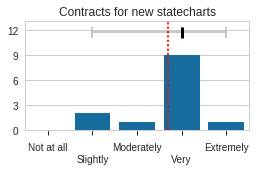

Property statecharts for new statecharts
1 1 2 3 4 avg: 2.15384615385


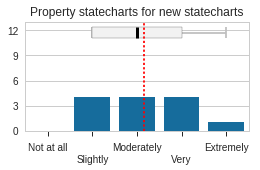

BDD to verify statecharts
1 2 3 3 4 avg: 2.76923076923


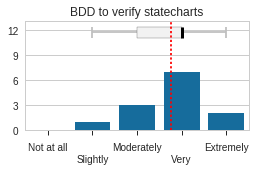

Contracts to verify statecharts
1 3 3 3 4 avg: 2.84615384615


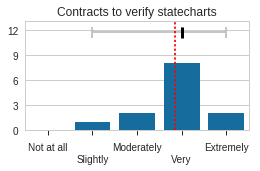

Property statecharts to verify statecharts
0 2 3 3 4 avg: 2.38461538462


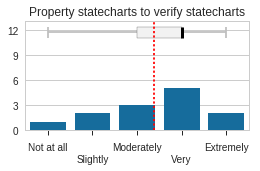

BDD to modify statecharts
2 3 3 3 4 avg: 3.0


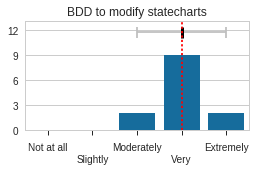

Contracts to modify statecharts
1 2 3 3 4 avg: 2.61538461538


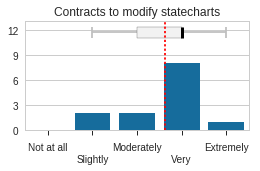

Property statecharts to modify statecharts
0 2 3 3 3 avg: 2.38461538462


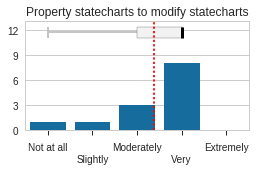

In [7]:
for q_label, q_title, q_scale in questions: 
    fig, ax = mpl.pyplot.subplots()
    fig.set_size_inches(FIGSIZE)
    serie = data[q_label]
    labels = scales[q_scale]
    values = list(range(len(labels)))
    
    plot_distribution(ax, serie, q_title, labels, values)
    savefig(fig, q_label)
    

subset = ['4.{}.{}'.format(i, a) for i in [1, 2, 3] for a in 'ABC']
mapping = {'A': 'BDD', 'B': 'Contracts', 'C': 'Property statecharts'}

ndata = pandas.melt(data[subset], value_vars=subset)

for i in [1, 2, 3]:
    for a in 'ABC': 
        ndata = ndata.replace({'variable': {'4.{}.{}'.format(i, a): mapping[a]}})
        

for key, value in mapping.items():
    fig, ax = mpl.pyplot.subplots()
    fig.set_size_inches(FIGSIZE)
    serie = ndata[ndata['variable'] == value].value
    labels = scales['helpfulness']
    values = list(range(len(labels)))
    
    plot_distribution(ax, serie, value, labels, values)
    savefig(fig, value)

            T1.1       T2.1       T3.1       T4.1       T5.2       T6.4  \
count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
mean    5.961538  10.692308   8.923077   8.000000  17.076923  31.076923   
std     4.332347   5.088952   7.653556   4.020779   7.804502  12.189213   
min     0.500000   2.000000   2.000000   2.000000   5.000000  15.000000   
25%     3.000000   7.000000   5.000000   5.000000  12.000000  22.000000   
50%     5.000000  10.000000   7.000000   9.000000  15.000000  30.000000   
75%    10.000000  15.000000   8.000000  10.000000  20.000000  35.000000   
max    15.000000  21.000000  30.000000  15.000000  30.000000  60.000000   

            T7.3       T8.4        T9.4       Total  
count  12.000000  13.000000   13.000000   13.000000  
mean    3.166667  36.923077   51.076923  172.653846  
std     3.214550  18.674678   28.756047   69.445238  
min     1.000000  10.000000   15.000000   58.000000  
25%     1.000000  25.000000   33.000000  133.000000  


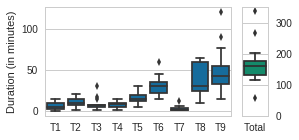

In [8]:
durations = ['T1.1', 'T2.1', 'T3.1', 'T4.1', 'T5.2', 'T6.4', 'T7.3', 'T8.4', 'T9.4']

fig, (ax, ax2) = mpl.pyplot.subplots(ncols=2, gridspec_kw=
                                     {
                                         'width_ratios': [7, 1],
                                         'wspace': 0.1
                                     })
fig.set_size_inches(FIGSIZE)

ndata = pandas.melt(data[durations], value_vars=durations, var_name='task').dropna()
seaborn.boxplot(x='task', y='value', data=ndata, color=seaborn.color_palette()[0], ax=ax)

ax.set(
    title='Task durations',
    xlabel='',
    ylabel='Duration (in minutes)',
)
ax.set_xticklabels([x.get_text()[:2] for x in ax.get_xticklabels()])


seaborn.boxplot(y='Total', color=seaborn.color_palette()[1], ax=ax2,
                data=data[durations].assign(Total=lambda df: df[durations].fillna(0).sum(axis=1)))
ax2.yaxis.tick_right()
ax2.set_ylim(bottom=0)
ax2.set(
    title='',
    xlabel='',
    ylabel='',
)
ax2.set_xticklabels(['Total' for x in ax2.get_xticklabels()])

savefig(fig, 'task_duration')

print(data[durations].assign(Total=lambda df: df[durations].fillna(0).sum(axis=1)).describe())

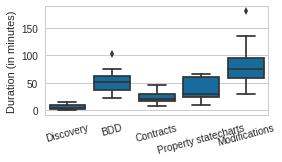

In [9]:
durations = [
    ('Discovery', ['T1.1']),
    ('BDD', ['T2.1', 'T3.1', 'T6.4', 'T7.3']),
    ('Contracts', ['T4.1', 'T5.2']),
    ('Property statecharts', ['T8.4']),
    ('Modifications', ['T6.4', 'T9.4']),
]

ndata = data.copy()
activities = []
for activity, tasks in durations:
    activities.append(activity)
    ndata[activity] = ndata[tasks].fillna(0).sum(axis=1)

ndata = pandas.melt(ndata[activities], value_vars=activities, var_name='activity')
ax = seaborn.boxplot(x='activity', y='value', data=ndata, color=seaborn.color_palette()[0])
ax.figure.set_size_inches(FIGSIZE)

ax.set(
    title='Activity durations',
    xlabel='',
    ylabel='Duration (in minutes)',
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

savefig(ax.figure, 'activity_duration')